#Problem 1
##Question 1

Run the Apriori algorithm to generate all frequent itemsets from the 'T10I4D100K' data set at a support thresholds of 0.01%, 0.02% and 0.03%, and report the number of frequent itemsets so produced. Use the -ts option with Apriori to generate frequent itemsets. Compare the performance of the algorithm in terms of the time taken to produce the results at these thresholds, and comment on the possible reason(s) for this difference in performance. You may estimate the amount of time spent by adding up the time displayed by the program when it is executed. Include all the times displayed by the program.

In [83]:
!pip install  apyori
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori

In [84]:

#importing dataset
dataset = pd.read_csv('T10I4D100K.csv')
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,25.0,52.0,164.0,240.0,274.0,328.0,368.0,448.0,538.0,561.0,630.0,687.0,730.0,775.0,825.0,834.0,NaN,NaN,NaN
1,39.0,120.0,124.0,205.0,401.0,581.0,704.0,814.0,825.0,834.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,35.0,249.0,674.0,712.0,733.0,759.0,854.0,950.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,39.0,422.0,449.0,704.0,825.0,857.0,895.0,937.0,954.0,964.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15.0,229.0,262.0,283.0,294.0,352.0,381.0,708.0,738.0,766.0,853.0,883.0,966.0,978.0,NaN,NaN,NaN,NaN,NaN


In [85]:
#Converting data into a list
records = []
for i in range(0, 104299):records.append([str(dataset.values[i,j]) for j in range(0, 19)])

In [86]:
#generate all frequent itemsets at a support threshold 0.01
association_rules = apriori(records, min_support=0.01)
association_results = list(association_rules) 

In [87]:
#convert the list into a dataframe
df = pd.DataFrame(columns=('Items','Antecedent','Consequent','Support','Confidence','Lift'))

Support =[]
Confidence = []
Lift = []
Items = []
Antecedent = []
Consequent=[]

for RelationRecord in association_results:
    for ordered_stat in RelationRecord.ordered_statistics:
        Support.append(RelationRecord.support)
        Items.append(RelationRecord.items)
        Antecedent.append(ordered_stat.items_base)
        Consequent.append(ordered_stat.items_add)
        Confidence.append(ordered_stat.confidence)
        Lift.append(ordered_stat.lift)

df['Items'] = list(map(set, Items))                                   
df['Antecedent'] = list(map(set, Antecedent))
df['Consequent'] = list(map(set, Consequent))
df['Support'] = Support
df['Confidence'] = Confidence
df['Lift']= Lift
print(df)

                    Items      Antecedent      Consequent   Support  \
0                   {1.0}              {}           {1.0}  0.014717   
1                  {10.0}              {}          {10.0}  0.012953   
2                 {100.0}              {}         {100.0}  0.016769   
3                 {104.0}              {}         {104.0}  0.011103   
4                 {105.0}              {}         {105.0}  0.010547   
...                   ...             ...             ...       ...   
1532  {829.0, nan, 789.0}         {829.0}    {nan, 789.0}  0.011352   
1533  {829.0, nan, 789.0}           {nan}  {829.0, 789.0}  0.011352   
1534  {829.0, nan, 789.0}  {829.0, 789.0}           {nan}  0.011352   
1535  {829.0, nan, 789.0}    {nan, 789.0}         {829.0}  0.011352   
1536  {829.0, nan, 789.0}    {829.0, nan}         {789.0}  0.011352   

      Confidence      Lift  
0       0.014717  1.000000  
1       0.012953  1.000000  
2       0.016769  1.000000  
3       0.011103  1.000000  
4 

In [88]:
#Number of frequent items produced
df.shape[0]

1537

In [89]:
#generate all frequent itemsets at a support threshold 0.02
association_rules = apriori(records, min_support=0.02)
association_results = list(association_rules)

In [90]:

#convert the list into a dataframe
df = pd.DataFrame(columns=('Items','Antecedent','Consequent','Support','Confidence','Lift'))

Support =[]
Confidence = []
Lift = []
Items = []
Antecedent = []
Consequent=[]

for RelationRecord in association_results:
    for ordered_stat in RelationRecord.ordered_statistics:
        Support.append(RelationRecord.support)
        Items.append(RelationRecord.items)
        Antecedent.append(ordered_stat.items_base)
        Consequent.append(ordered_stat.items_add)
        Confidence.append(ordered_stat.confidence)
        Lift.append(ordered_stat.lift)

df['Items'] = list(map(set, Items))                                   
df['Antecedent'] = list(map(set, Antecedent))
df['Consequent'] = list(map(set, Consequent))
df['Support'] = Support
df['Confidence'] = Confidence
df['Lift']= Lift
print(df)

            Items Antecedent    Consequent   Support  Confidence      Lift
0         {112.0}         {}       {112.0}  0.025695    0.025695  1.000000
1         {116.0}         {}       {116.0}  0.021026    0.021026  1.000000
2          {12.0}         {}        {12.0}  0.032742    0.032742  1.000000
3         {120.0}         {}       {120.0}  0.047680    0.047680  1.000000
4         {132.0}         {}       {132.0}  0.025321    0.025321  1.000000
..            ...        ...           ...       ...         ...       ...
576  {nan, 970.0}    {970.0}         {nan}  0.020000    1.000000  1.000278
577  {nan, 970.0}      {nan}       {970.0}  0.020000    0.020006  1.000278
578  {nan, 998.0}         {}  {nan, 998.0}  0.026002    0.026002  1.000000
579  {nan, 998.0}    {998.0}         {nan}  0.026002    0.999631  0.999909
580  {nan, 998.0}      {nan}       {998.0}  0.026002    0.026009  0.999909

[581 rows x 6 columns]


In [91]:
#Number of frequent items produced
df.shape[0]

581

In [92]:
#Number of frequent items produced
df.shape[0]

581

In [93]:
#generate all frequent itemsets at a support threshold 0.03
association_rules = apriori(records, min_support=0.03)
association_results = list(association_rules)

In [94]:
#convert the list into a dataframe
df = pd.DataFrame(columns=('Items','Antecedent','Consequent','Support','Confidence','Lift'))

Support =[]
Confidence = []
Lift = []
Items = []
Antecedent = []
Consequent=[]

for RelationRecord in association_results:
    for ordered_stat in RelationRecord.ordered_statistics:
        Support.append(RelationRecord.support)
        Items.append(RelationRecord.items)
        Antecedent.append(ordered_stat.items_base)
        Consequent.append(ordered_stat.items_add)
        Confidence.append(ordered_stat.confidence)
        Lift.append(ordered_stat.lift)

df['Items'] = list(map(set, Items))                                   
df['Antecedent'] = list(map(set, Antecedent))
df['Consequent'] = list(map(set, Consequent))
df['Support'] = Support
df['Confidence'] = Confidence
df['Lift']= Lift
print(df)

            Items Antecedent    Consequent   Support  Confidence      Lift
0          {12.0}         {}        {12.0}  0.032742    0.032742  1.000000
1         {120.0}         {}       {120.0}  0.047680    0.047680  1.000000
2         {145.0}         {}       {145.0}  0.043711    0.043711  1.000000
3         {177.0}         {}       {177.0}  0.044382    0.044382  1.000000
4         {183.0}         {}       {183.0}  0.037230    0.037230  1.000000
..            ...        ...           ...       ...         ...       ...
196  {956.0, nan}    {956.0}         {nan}  0.034746    0.999448  0.999726
197  {956.0, nan}      {nan}       {956.0}  0.034746    0.034756  0.999726
198  {966.0, nan}         {}  {966.0, nan}  0.037575    0.037575  1.000000
199  {966.0, nan}    {966.0}         {nan}  0.037575    0.999490  0.999768
200  {966.0, nan}      {nan}       {966.0}  0.037575    0.037585  0.999768

[201 rows x 6 columns]


In [95]:
#Number of frequent items produced
df.shape[0]

201

###Compare the performance of the algorithm in terms of the time taken to produce the results at these thresholds, and comment on the possible reason(s) for this difference in performance.

The time performance of apriori algorithm is inversely proportional to support thrsehold. It took 14 secs for threshold 0.01, 2.33 secs for threshold 0.02 and 1.40 secs for threshold 0.03.
As the algorithm filters all items below the assigned threshold, the time performance of apriori algorithm is faster with increasing support threshold.

##Question 2
Run Apriori (using the -ts option) on the 'mushroom' data set to generate frequent itemsets of sizes 2 through 15 at support thresholds of 5%, 10% and 20%. Generate three plots, one for each threshold, showing the number of frequent sets obtained of size 2 through size 15. (To get the distribution of the number of frequent itemsets use option -Z). Comment on the general trends illustrated by the plots, and comment on the reason(s) for these trends. Also comment on how the plots vary between the three thresholds.

In [96]:
#importing dataset
dataset2 = pd.read_csv('mushroom.csv')
dataset2.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1.0,3.0,9.0,13.0,23.0,25.0,34.0,36.0,38.0,40.0,...,63.0,67.0,76.0,85.0,86.0,90.0,93.0,98.0,107.0,113.0
1,2.0,3.0,9.0,14.0,23.0,26.0,34.0,36.0,39.0,40.0,...,63.0,67.0,76.0,85.0,86.0,90.0,93.0,99.0,108.0,114.0
2,2.0,4.0,9.0,15.0,23.0,27.0,34.0,36.0,39.0,41.0,...,63.0,67.0,76.0,85.0,86.0,90.0,93.0,99.0,108.0,115.0
3,1.0,3.0,10.0,15.0,23.0,25.0,34.0,36.0,38.0,41.0,...,63.0,67.0,76.0,85.0,86.0,90.0,93.0,98.0,107.0,113.0
4,2.0,3.0,9.0,16.0,24.0,28.0,34.0,37.0,39.0,40.0,...,63.0,67.0,76.0,85.0,86.0,90.0,94.0,99.0,109.0,114.0


In [97]:
#Converting data into a list
records2 = []
for i in range(0, 10988):records2.append([str(dataset2.values[i,j]) for j in range(0, 23)])

In [98]:
#generate all frequent itemsets of sizes 2 through 15 at support thresholds of 20%
association_rules = apriori(records2, min_support=0.2, min_length = 2, max_length = 15)
association_results = list(association_rules) 

In [99]:
#convert the list into a dataframe
df = pd.DataFrame(columns=('Items','Antecedent','Consequent','Support','Confidence','Lift'))

Support =[]
Confidence = []
Lift = []
Items = []
Antecedent = []
Consequent=[]

for RelationRecord in association_results:
    for ordered_stat in RelationRecord.ordered_statistics:
        Support.append(RelationRecord.support)
        Items.append(RelationRecord.items)
        Antecedent.append(ordered_stat.items_base)
        Consequent.append(ordered_stat.items_add)
        Confidence.append(ordered_stat.confidence)
        Lift.append(ordered_stat.lift)

df['Items'] = list(map(set, Items))                                   
df['Antecedent'] = list(map(set, Antecedent))
df['Consequent'] = list(map(set, Consequent))
df['Support'] = Support
df['Confidence'] = Confidence
df['Lift']= Lift

In [100]:
#get the length of items (size)
df['length'] = df['Items'].apply(lambda x: len(x))
df

,Items,Antecedent,Consequent,Support,Confidence,Lift,length
0,{1.0},{},{1.0},0.356389,0.356389,1.000000,1
1,{10.0},{},{10.0},0.295231,0.295231,1.000000,1
2,{102.0},{},{102.0},0.217328,0.217328,1.000000,1
3,{11.0},{},{11.0},0.211139,0.211139,1.000000,1
4,{110.0},{},{110.0},0.367674,0.367674,1.000000,1
...,...,...,...,...,...,...,...
225996,"{23.0, 36.0, 85.0, 93.0, 34.0, 39.0, 86.0, 2.0...","{23.0, 36.0, 85.0, 93.0, 34.0, 86.0, 2.0, 90.0...",{39.0},0.203859,1.000000,1.957947,11
225997,"{23.0, 36.0, 85.0, 93.0, 34.0, 39.0, 86.0, 2.0...","{23.0, 85.0, 93.0, 34.0, 39.0, 86.0, 2.0, 90.0...",{36.0},0.203859,1.000000,1.613036,11
225998,"{23.0, 36.0, 85.0, 93.0, 34.0, 39.0, 86.0, 2.0...","{23.0, 36.0, 85.0, 93.0, 39.0, 86.0, 2.0, 90.0...",{34.0},0.203859,1.000000,1.388426,11
225999,"{23.0, 36.0, 85.0, 93.0, 34.0, 39.0, 86.0, 2.0...","{36.0, 85.0, 93.0, 34.0, 39.0, 86.0, 2.0, 90.0...",{23.0},0.203859,1.000000,3.254739,11


In [101]:
#Subset size from 2 to 15
size = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
df2= df[df.length.isin(size)]
#get the number of frequent itemset with sized 2:15
n20 = df2.shape[0]
n20

225967

In [102]:
#generate all frequent itemsets of sizes 2 through 15 at support thresholds of 25%
association_rules = apriori(records2, min_support=0.25, min_length = 2, max_length = 15)
association_results = list(association_rules)

In [103]:
#convert the list into a dataframe
df = pd.DataFrame(columns=('Items','Antecedent','Consequent','Support','Confidence','Lift'))

Support =[]
Confidence = []
Lift = []
Items = []
Antecedent = []
Consequent=[]

for RelationRecord in association_results:
    for ordered_stat in RelationRecord.ordered_statistics:
        Support.append(RelationRecord.support)
        Items.append(RelationRecord.items)
        Antecedent.append(ordered_stat.items_base)
        Consequent.append(ordered_stat.items_add)
        Confidence.append(ordered_stat.confidence)
        Lift.append(ordered_stat.lift)

df['Items'] = list(map(set, Items))                                   
df['Antecedent'] = list(map(set, Antecedent))
df['Consequent'] = list(map(set, Consequent))
df['Support'] = Support
df['Confidence'] = Confidence
df['Lift']= Lift

In [104]:
#get the length of items (size)
df['length'] = df['Items'].apply(lambda x: len(x))
df

,Items,Antecedent,Consequent,Support,Confidence,Lift,length
0,{1.0},{},{1.0},0.356389,0.356389,1.000000,1
1,{10.0},{},{10.0},0.295231,0.295231,1.000000,1
2,{110.0},{},{110.0},0.367674,0.367674,1.000000,1
3,{116.0},{},{116.0},0.286494,0.286494,1.000000,1
4,{2.0},{},{2.0},0.382963,0.382963,1.000000,1
...,...,...,...,...,...,...,...
29926,"{36.0, 85.0, 93.0, 34.0, 86.0, 90.0, 63.0, 59.0}","{34.0, 86.0, 90.0, 36.0, 63.0, 59.0, 93.0}",{85.0},0.251183,1.000000,1.352536,8
29927,"{36.0, 85.0, 93.0, 34.0, 86.0, 90.0, 63.0, 59.0}","{34.0, 86.0, 90.0, 36.0, 85.0, 59.0, 93.0}",{63.0},0.251183,0.912698,2.031752,8
29928,"{36.0, 85.0, 93.0, 34.0, 86.0, 90.0, 63.0, 59.0}","{34.0, 86.0, 90.0, 36.0, 85.0, 63.0, 93.0}",{59.0},0.251183,0.974576,2.068903,8
29929,"{36.0, 85.0, 93.0, 34.0, 86.0, 90.0, 63.0, 59.0}","{34.0, 86.0, 90.0, 85.0, 59.0, 63.0, 93.0}",{36.0},0.251183,0.932432,1.504047,8


In [105]:
#Subset size from 2 to 15
size = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
df2= df[df.length.isin(size)]
#get the number of frequent itemset with sized 2:15
n25 = df2.shape[0]
n25

29905

In [106]:
#generate all frequent itemsets of sizes 2 through 15 at support thresholds of 30%
association_rules = apriori(records2, min_support=0.3, min_length = 2, max_length = 15)
association_results = list(association_rules)


In [107]:
#convert the list into a dataframe
df = pd.DataFrame(columns=('Items','Antecedent','Consequent','Support','Confidence','Lift'))

Support =[]
Confidence = []
Lift = []
Items = []
Antecedent = []
Consequent=[]

for RelationRecord in association_results:
    for ordered_stat in RelationRecord.ordered_statistics:
        Support.append(RelationRecord.support)
        Items.append(RelationRecord.items)
        Antecedent.append(ordered_stat.items_base)
        Consequent.append(ordered_stat.items_add)
        Confidence.append(ordered_stat.confidence)
        Lift.append(ordered_stat.lift)

df['Items'] = list(map(set, Items))                                   
df['Antecedent'] = list(map(set, Antecedent))
df['Consequent'] = list(map(set, Consequent))
df['Support'] = Support
df['Confidence'] = Confidence
df['Lift']= Lift

In [108]:
#get the length of items (size)
df['length'] = df['Items'].apply(lambda x: len(x))
df

,Items,Antecedent,Consequent,Support,Confidence,Lift,length
0,{1.0},{},{1.0},0.356389,0.356389,1.000000,1
1,{110.0},{},{110.0},0.367674,0.367674,1.000000,1
2,{2.0},{},{2.0},0.382963,0.382963,1.000000,1
3,{23.0},{},{23.0},0.307244,0.307244,1.000000,1
4,{24.0},{},{24.0},0.432108,0.432108,1.000000,1
...,...,...,...,...,...,...,...
6815,"{34.0, 39.0, 86.0, 90.0, 36.0, 85.0, 56.0}","{34.0, 39.0, 86.0, 90.0, 36.0, 56.0}",{85.0},0.301420,1.000000,1.352536,7
6816,"{34.0, 39.0, 86.0, 90.0, 36.0, 85.0, 56.0}","{34.0, 39.0, 86.0, 90.0, 36.0, 85.0}",{56.0},0.301420,0.824701,2.399846,7
6817,"{34.0, 39.0, 86.0, 90.0, 36.0, 85.0, 56.0}","{34.0, 86.0, 90.0, 36.0, 85.0, 56.0}",{39.0},0.301420,0.971831,1.902794,7
6818,"{34.0, 39.0, 86.0, 90.0, 36.0, 85.0, 56.0}","{34.0, 39.0, 86.0, 90.0, 85.0, 56.0}",{36.0},0.301420,1.000000,1.613036,7


In [109]:
#Subset size from 2 to 15
size = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
df2= df[df.length.isin(size)]
#get the number of frequent itemset with sized 2:15
n30 = df2.shape[0]
n30

6798

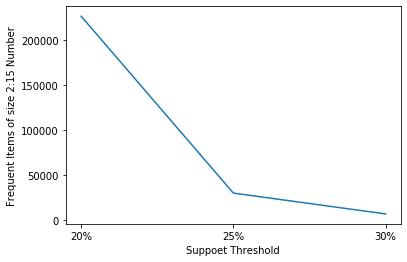

In [110]:
#plot the frequent items and support threshold
plt.plot(['20%', '25%', '30%'], [225967, 29905, 6798])
plt.xlabel('Suppoet Threshold')
plt.ylabel('Frequent Items of size 2:15 Number')
plt.show()

As we can see from the plot the number of frequent items shows dramatically decrease with increasing support threshold from 20 to 25 while it shows slight decrease with increasing support threshold from 25 to 30.

Use the Apriori algorithm to generate closed (using the -tc option) and maximal (using the -tm option) frequent itemsets from the 'T10I4D100K' and 'mushroom' data sets. Use a support threshold of 5% for the 'mushroom' data set and 0.01% for the 'T10I4D100K' data set. Compare the total number of closed and maximal frequent itemsets obtained for each dataset individually. How do these numbers compare with the number of frequent itemsets obtained from these data sets using the same threshold? What relationship among closed, maximal and frequent itemsets is revealed by this comparison?

In [111]:
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder

In [112]:
te = TransactionEncoder()
te_ary = te.fit(records2).transform(records2)
dfencoded = pd.DataFrame(te_ary, columns=te.columns_)
dfencoded

,1.0,10.0,100.0,101.0,102.0,103.0,104.0,105.0,106.0,107.0,...,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,nan
0,True,False,False,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
3,True,True,False,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10983,False,False,False,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
10984,True,True,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
10985,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10986,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False


Maximum frequent itemsets for mushroom data

In [113]:
#Get the maximum frequent itemset for mushroom dataset at support threshold 20%
from mlxtend.frequent_patterns import fpmax

fmax1 = fpmax(dfencoded, min_support=0.2, max_len = 15)
print(len(fmax1))

87


In [114]:
#Get the maximum frequent itemset for mushroom dataset at support threshold 25%
fmax2 = fpmax(dfencoded, min_support=0.25, max_len = 15)
print(len(fmax2))

63


In [115]:
#Get the maximum frequent itemset for mushroom dataset at support threshold 30%
fmax3 = fpmax(dfencoded, min_support=0.3, max_len = 15)
print(len(fmax3))

37


closed frequent itemsets for mushroom data

In [116]:
import time
from mlxtend.frequent_patterns import fpgrowth

In [117]:
#Get the maximum frequent itemset for mushroom dataset at support threshold 20%
te = TransactionEncoder()
te_ary = te.fit(records2).transform(records2)
df = pd.DataFrame(te_ary, columns=te.columns_)
start_time = time.time()
frequent = fpgrowth(df, min_support=0.2, use_colnames=True)
su = frequent.support.unique()#all unique support count
#Dictionay storing itemset with same support count key
fredic = {}
for i in range(len(su)):
    inset = list(frequent.loc[frequent.support ==su[i]]['itemsets'])
    fredic[su[i]] = inset
#Dictionay storing itemset with  support count <= key
fredic2 = {}
for i in range(len(su)):
    inset2 = list(frequent.loc[frequent.support<=su[i]]['itemsets'])
    fredic2[su[i]] = inset2

#Find Closed frequent itemset
start_time = time.time()
cl = []
for index, row in frequent.iterrows():
    isclose = True
    cli = row['itemsets']
    cls = row['support']
    checkset = fredic[cls]
    for i in checkset:
        if (cli!=i):
            if(frozenset.issubset(cli,i)):
                isclose = False
                break
    
    if(isclose):
        cl.append(row['itemsets'])
print(len(cl))

584


In [118]:
#Get the maximum frequent itemset for mushroom dataset at support threshold 25%
te = TransactionEncoder()
te_ary = te.fit(records2).transform(records2)
df = pd.DataFrame(te_ary, columns=te.columns_)
start_time = time.time()
frequent = fpgrowth(df, min_support=0.25, use_colnames=True)
su = frequent.support.unique()#all unique support count
#Dictionay storing itemset with same support count key
fredic = {}
for i in range(len(su)):
    inset = list(frequent.loc[frequent.support ==su[i]]['itemsets'])
    fredic[su[i]] = inset
#Dictionay storing itemset with  support count <= key
fredic2 = {}
for i in range(len(su)):
    inset2 = list(frequent.loc[frequent.support<=su[i]]['itemsets'])
    fredic2[su[i]] = inset2

#Find Closed frequent itemset
start_time = time.time()
cl = []
for index, row in frequent.iterrows():
    isclose = True
    cli = row['itemsets']
    cls = row['support']
    checkset = fredic[cls]
    for i in checkset:
        if (cli!=i):
            if(frozenset.issubset(cli,i)):
                isclose = False
                break
    
    if(isclose):
        cl.append(row['itemsets'])
print(len(cl))

295


In [119]:
#Get the maximum frequent itemset for mushroom dataset at support threshold 30%
te = TransactionEncoder()
te_ary = te.fit(records2).transform(records2)
df = pd.DataFrame(te_ary, columns=te.columns_)
start_time = time.time()
frequent = fpgrowth(df, min_support=0.3, use_colnames=True)
su = frequent.support.unique()#all unique support count
#Dictionay storing itemset with same support count key
fredic = {}
for i in range(len(su)):
    inset = list(frequent.loc[frequent.support ==su[i]]['itemsets'])
    fredic[su[i]] = inset
#Dictionay storing itemset with  support count <= key
fredic2 = {}
for i in range(len(su)):
    inset2 = list(frequent.loc[frequent.support<=su[i]]['itemsets'])
    fredic2[su[i]] = inset2

#Find Closed frequent itemset
start_time = time.time()
cl = []
for index, row in frequent.iterrows():
    isclose = True
    cli = row['itemsets']
    cls = row['support']
    checkset = fredic[cls]
    for i in checkset:
        if (cli!=i):
            if(frozenset.issubset(cli,i)):
                isclose = False
                break
    
    if(isclose):
        cl.append(row['itemsets'])
print(len(cl))

129


The frequent itemset number for thresholds 20, 25 and 30 are 225967, 29905, and 6798
The maximum frequent itemset number for thresholds 20, 25 and 30 are 87, 63,and 37
The closed frequent itemset number for thresholds 20, 25 and 30 are 584, 295, and 129
We can observe that the numbers of frequent itemsets are higher than closed frequent itemsets and closed frequent itemsets are higher than maximum frequent itemsets as closed and maximal frequent itemsets are subsets of frequent itemsets but maximal frequent itemsets are a more compact representation because it is a subset of closed frequent itemsets. 

Maximum frequent itemsets for T10I4D100K data

In [120]:
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder

In [121]:
te = TransactionEncoder()
te_ary = te.fit(records).transform(records)
dfencoded = pd.DataFrame(te_ary, columns=te.columns_)
dfencoded

,0.0,1.0,10.0,100.0,101.0,102.0,103.0,104.0,105.0,108.0,...,989.0,990.0,991.0,992.0,994.0,995.0,997.0,998.0,999.0,nan
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104294,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
104295,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
104296,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
104297,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [122]:
#Get the maximum frequent itemset for T10I4D100K dataset at support threshold 0.01
from mlxtend.frequent_patterns import fpmax

fmax1 = fpmax(dfencoded, min_support=0.01)
print(len(fmax1))

361


In [123]:
#Get the maximum frequent itemset for T10I4D100K dataset at support threshold 0.02
from mlxtend.frequent_patterns import fpmax

fmax2 = fpmax(dfencoded, min_support=0.02)
print(len(fmax2))

145


In [124]:
#Get the maximum frequent itemset for T10I4D100K dataset at support threshold 0.03
from mlxtend.frequent_patterns import fpmax

fmax3 = fpmax(dfencoded, min_support=0.03)
print(len(fmax3))

50


closed frequent itemsets for T10I4D100K data

In [125]:
#Get the maximum frequent itemset for T10I4D100K dataset at support threshold 0.01
te = TransactionEncoder()
te_ary = te.fit(records).transform(records)
df = pd.DataFrame(te_ary, columns=te.columns_)
start_time = time.time()
frequent = fpgrowth(df, min_support=0.01, use_colnames=True)
su = frequent.support.unique()#all unique support count
#Dictionay storing itemset with same support count key
fredic = {}
for i in range(len(su)):
    inset = list(frequent.loc[frequent.support ==su[i]]['itemsets'])
    fredic[su[i]] = inset
#Dictionay storing itemset with  support count <= key
fredic2 = {}
for i in range(len(su)):
    inset2 = list(frequent.loc[frequent.support<=su[i]]['itemsets'])
    fredic2[su[i]] = inset2

#Find Closed frequent itemset
start_time = time.time()
cl = []
for index, row in frequent.iterrows():
    isclose = True
    cli = row['itemsets']
    cls = row['support']
    checkset = fredic[cls]
    for i in checkset:
        if (cli!=i):
            if(frozenset.issubset(cli,i)):
                isclose = False
                break
    
    if(isclose):
        cl.append(row['itemsets'])
print(len(cl))

595


In [126]:
#Get the maximum frequent itemset for T10I4D100K dataset at support threshold 0.02
te = TransactionEncoder()
te_ary = te.fit(records).transform(records)
df = pd.DataFrame(te_ary, columns=te.columns_)
start_time = time.time()
frequent = fpgrowth(df, min_support=0.02, use_colnames=True)
su = frequent.support.unique()#all unique support count
#Dictionay storing itemset with same support count key
fredic = {}
for i in range(len(su)):
    inset = list(frequent.loc[frequent.support ==su[i]]['itemsets'])
    fredic[su[i]] = inset
#Dictionay storing itemset with  support count <= key
fredic2 = {}
for i in range(len(su)):
    inset2 = list(frequent.loc[frequent.support<=su[i]]['itemsets'])
    fredic2[su[i]] = inset2

#Find Closed frequent itemset
start_time = time.time()
cl = []
for index, row in frequent.iterrows():
    isclose = True
    cli = row['itemsets']
    cls = row['support']
    checkset = fredic[cls]
    for i in checkset:
        if (cli!=i):
            if(frozenset.issubset(cli,i)):
                isclose = False
                break
    
    if(isclose):
        cl.append(row['itemsets'])
print(len(cl))

250


In [127]:
#Get the maximum frequent itemset for T10I4D100K dataset at support threshold 0.03
te = TransactionEncoder()
te_ary = te.fit(records).transform(records)
df = pd.DataFrame(te_ary, columns=te.columns_)
start_time = time.time()
frequent = fpgrowth(df, min_support=0.03, use_colnames=True)
su = frequent.support.unique()#all unique support count
#Dictionay storing itemset with same support count key
fredic = {}
for i in range(len(su)):
    inset = list(frequent.loc[frequent.support ==su[i]]['itemsets'])
    fredic[su[i]] = inset
#Dictionay storing itemset with  support count <= key
fredic2 = {}
for i in range(len(su)):
    inset2 = list(frequent.loc[frequent.support<=su[i]]['itemsets'])
    fredic2[su[i]] = inset2

#Find Closed frequent itemset
start_time = time.time()
cl = []
for index, row in frequent.iterrows():
    isclose = True
    cli = row['itemsets']
    cls = row['support']
    checkset = fredic[cls]
    for i in checkset:
        if (cli!=i):
            if(frozenset.issubset(cli,i)):
                isclose = False
                break
    
    if(isclose):
        cl.append(row['itemsets'])
print(len(cl))

89


The frequent itemset number for thresholds 0.01, 0.02 and 0.03 are 1537, 581, and 201
The maximum frequent itemset number for thresholds 0.01, 0.02 and 0.03 are 361, 145,and 50
The closed frequent itemset number for thresholds 0.01, 0.02 and 0.03 are 595, 250, and 89
We can observe that the numbers of frequent itemsets are higher than closed frequent itemsets and closed frequent itemsets are higher than maximum frequent itemsets as closed and maximal frequent itemsets are subsets of frequent itemsets but maximal frequent itemsets are a more compact representation because it is a subset of closed frequent itemsets. 